In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

Caso estejas usando o google coolab, descomente o seguinte código:

In [2]:
caminho = "datasets/poluicao_ar.csv"
# !pip install wget
# !wget https://raw.githubusercontent.com/plorazxi/Inteligencia-computacional/refs/heads/main/Aulas-faculdade/datasets/poluicao_ar.csv
# caminho = "/content/poluicao_ar.csv"

In [3]:
dados = pd.read_csv(caminho, sep=';')
dados.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
#Entrada dos dados
X = dados.drop(columns = ['Air Quality'])
Y = dados[['Air Quality']]

In [5]:
#divisao dos dados X, Y
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, shuffle = True, test_size = 0.2)

#normalizando os dados treino e teste
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#configuracao do classificador SVM
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

c:\Users\paulo\Documents\Projetos\Inteligencia computacional\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
#métricas de avaliação
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       426
   Hazardous       0.92      0.83      0.88       103
    Moderate       0.94      0.96      0.95       291
        Poor       0.85      0.87      0.86       180

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



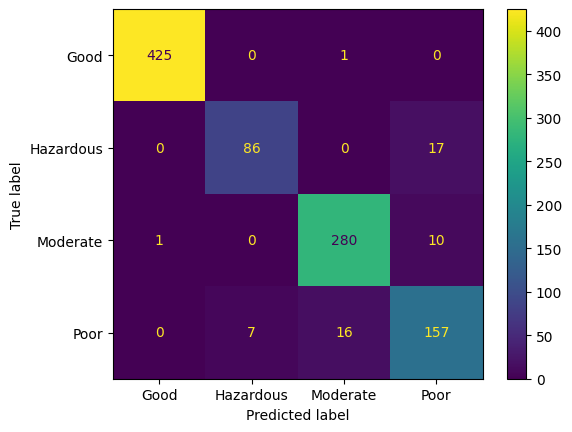

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Matriz de confusão SVM
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, y_pred), display_labels=clf.classes_).plot()
plt.grid(False)
plt.show()

1797
Predition:


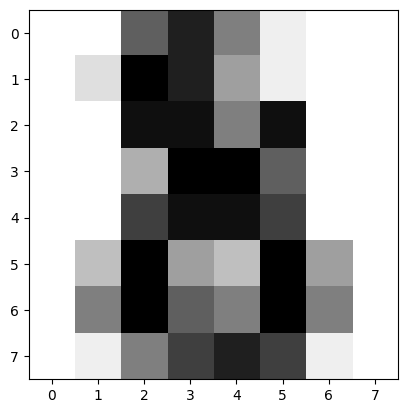

In [9]:
digits = datasets.load_digits()
clf = svm.SVC(gamma = 0.0001, C = 100)
print(len(digits.data))

x,y = digits.data[:-1], digits.target[:-1]
clf.fit(x,y)
print('Predition:'), clf.predict(digits.data[:-1])
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation = 'nearest')
plt.show()